In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import seaborn as sns

In [22]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

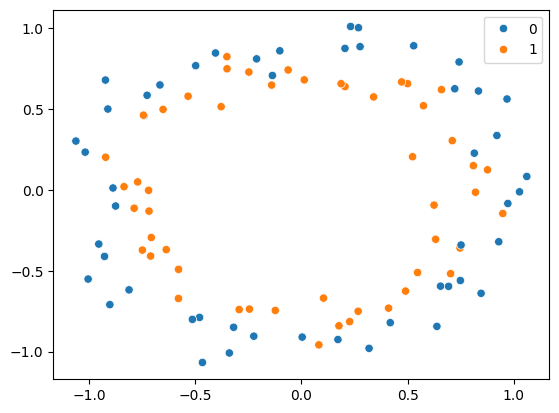

In [25]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=1)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8594 - loss: 0.3814 - val_accuracy: 0.6500 - val_loss: 0.5667
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8828 - loss: 0.3773 - val_accuracy: 0.6500 - val_loss: 0.5698
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8633 - loss: 0.3763 - val_accuracy: 0.6500 - val_loss: 0.5731
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8594 - loss: 0.3819 - val_accuracy: 0.6500 - val_loss: 0.5738
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8773 - loss: 0.3712 - val_accuracy: 0.6500 - val_loss: 0.5743
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8945 - loss: 0.3520 - val_accuracy: 0.6500 - val_loss: 0.5720
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8766 - loss: 0.3596 - val_accuracy: 0.6500 - val_loss: 0.5716
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8570 - loss: 0.3689 - val_accuracy: 0.7000 - v

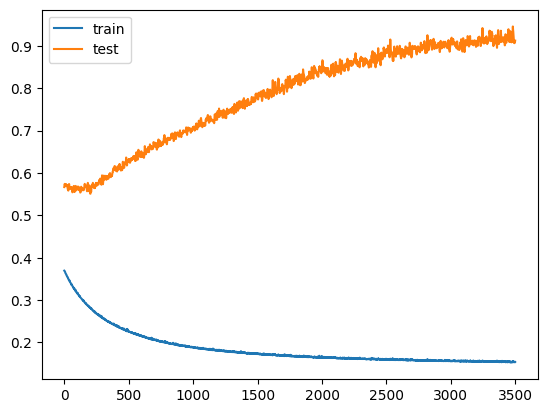

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 996us/step


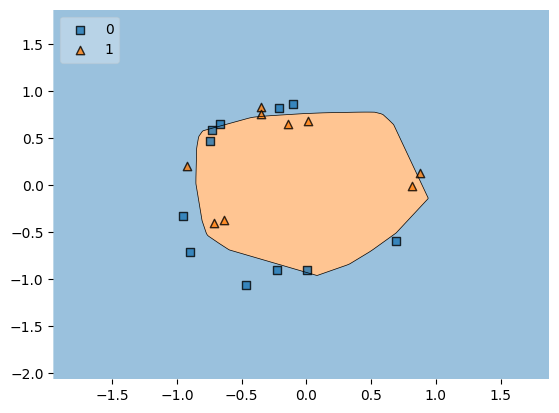

In [36]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

In [37]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = None
)

In [40]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, callbacks = callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.5203 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.7046
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6039 - loss: 0.6897 - val_accuracy: 0.4000 - val_loss: 0.7055
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5523 - loss: 0.6890 - val_accuracy: 0.4000 - val_loss: 0.7049
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5344 - loss: 0.6904 - val_accuracy: 0.4000 - val_loss: 0.7044
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5617 - loss: 0.6869 - val_accuracy: 0.4000 - val_loss: 0.7047
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5633 - loss: 0.6847 - val_accuracy: 0.4000 - val_loss: 0.7053
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5422 - loss: 0.6886 - val_accuracy: 0.4000 - val_loss: 0.7064
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5797 - loss: 0.6819 - val_accuracy: 0.4000 - 

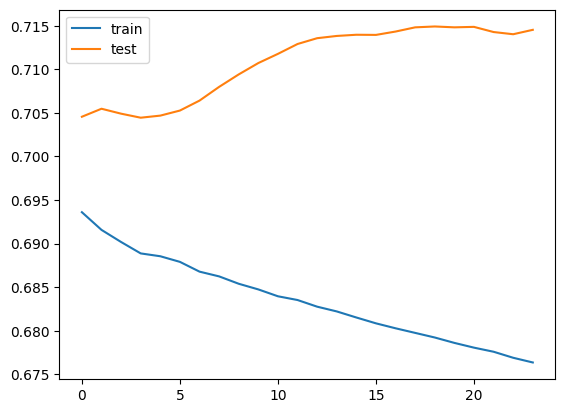

In [41]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()